In [2]:
#Importamos las librerías necesarias

from qiskit import QuantumCircuit, Aer, execute, transpile, ClassicalRegister,QuantumRegister
from qiskit.aqua.components.feature_maps.raw_feature_vector import RawFeatureVector
from math import pi
import numpy as np
from qiskit.visualization import  plot_histogram

In [7]:
U=[[1,0,0,0],
  [0,0,0,1],
  [0,1,0,0],
  [0,0,1,0]]

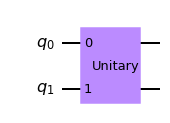

In [9]:
qc=QuantumCircuit(2)
qc.unitary(U,[0,1])
qc.draw(output="mpl")

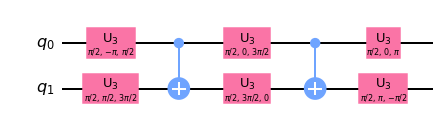

In [13]:
trans_qc=transpile(qc,basis_gates=['cx','u3'])
trans_qc.draw(output="mpl")

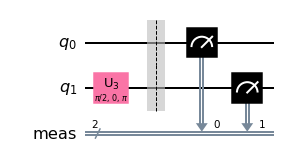

In [21]:
U=[[1,0,+1,0],
  [0,1,0,+1],
  [+1,0,-1,0],
  [0,+1,0,-1]]*1/np.sqrt(2)
qc=QuantumCircuit(2)
qc.unitary(U,[0,1])
qc.draw(output="mpl")
trans_qc=transpile(qc,basis_gates=['cx','u3'])
trans_qc.measure_all()
trans_qc.draw(output="mpl")

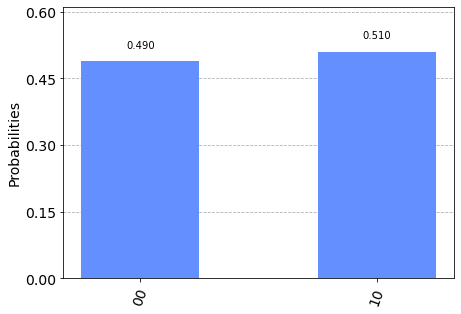

In [22]:
backend=Aer.get_backend('qasm_simulator')
job=execute(trans_qc,backend, shots=100)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)

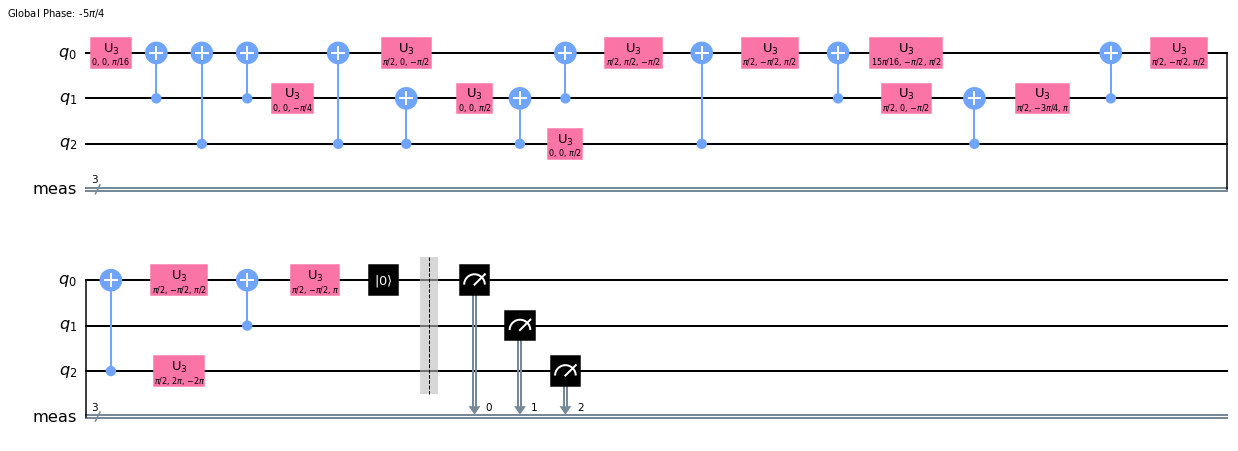

In [4]:
U=[[1,0,0,0,1,0,0,0],
  [0,1,0,0,0,1,0,0],
  [0,0,1,0,0,0,1,0],
  [0,0,0,1,0,0,0,1],
  [1,0,0,0,-1,0,0,0],
  [0,1,0,0,0,-1,0,0],
  [0,0,1,0,0,0,-1,0],
  [0,0,0,1,0,0,0,-1]]*1/np.sqrt(2)
qc=QuantumCircuit(3)
qc.unitary(U,[0,1,2])
qc.draw(output="mpl")
trans_qc=transpile(qc,basis_gates=['cx','u3'])

trans_qc.reset(0)
trans_qc.measure_all()
trans_qc.draw(output="mpl")

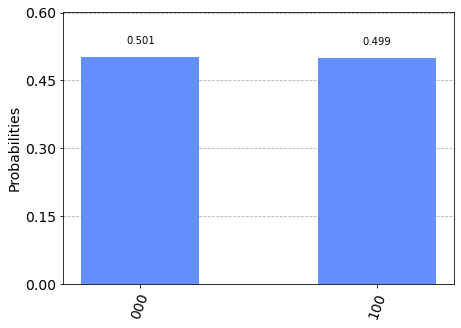

In [36]:
backend=Aer.get_backend('qasm_simulator')
job=execute(trans_qc,backend, shots=10000)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)

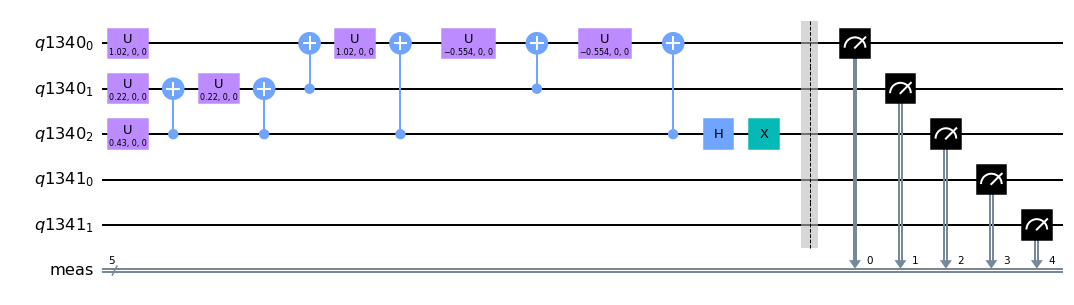

In [132]:
x=[4,2,1,0]
y=[0,1,0,0]
xy=np.append(x,y)
X = np.array(x)
Y = np.array(y)
XY=np.array(xy)       

fvc = RawFeatureVector(len(XY))
q1 = QuantumRegister(fvc.num_qubits)
q2=QuantumRegister(fvc.num_qubits-1)
c1 = ClassicalRegister(fvc.num_qubits)

ketxcircuit = fvc.construct_circuit(XY, qr=q1)
ancillaries= QuantumCircuit(q2)
#Detector=QuantumCircuit(3,fvc.num_qubits)
ketxcircuit=ketxcircuit+ancillaries

#ketxcircuit.unitary(U,[0,1,2])

#ketxcircuit.x(0)
#ketxcircuit.reset(0)
ketxcircuit.h(2)
ketxcircuit.x(2)
#ketxcircuit.reset(2)
#ketxcircuit.reset(0)
#for i in range(fvc.num_qubits-1):
#    ketxcircuit.cx(q1[fvc.num_qubits-1], q2[i])
    #ketxcircuit.reset(q1[i])
ketxcircuit.measure_all()
backend=Aer.get_backend('qasm_simulator')
job=execute(ketxcircuit,backend, shots=100000)
result=job.result()
counts=result.get_counts()

ketxcircuit.draw(output="mpl")
#plot_histogram(counts)


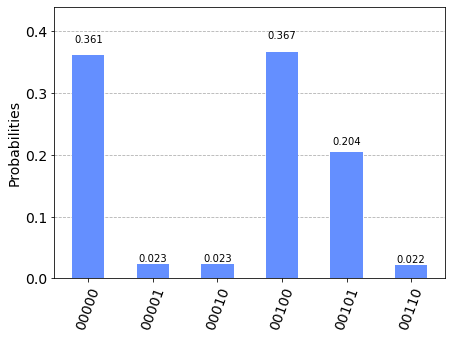

In [133]:
plot_histogram(counts)

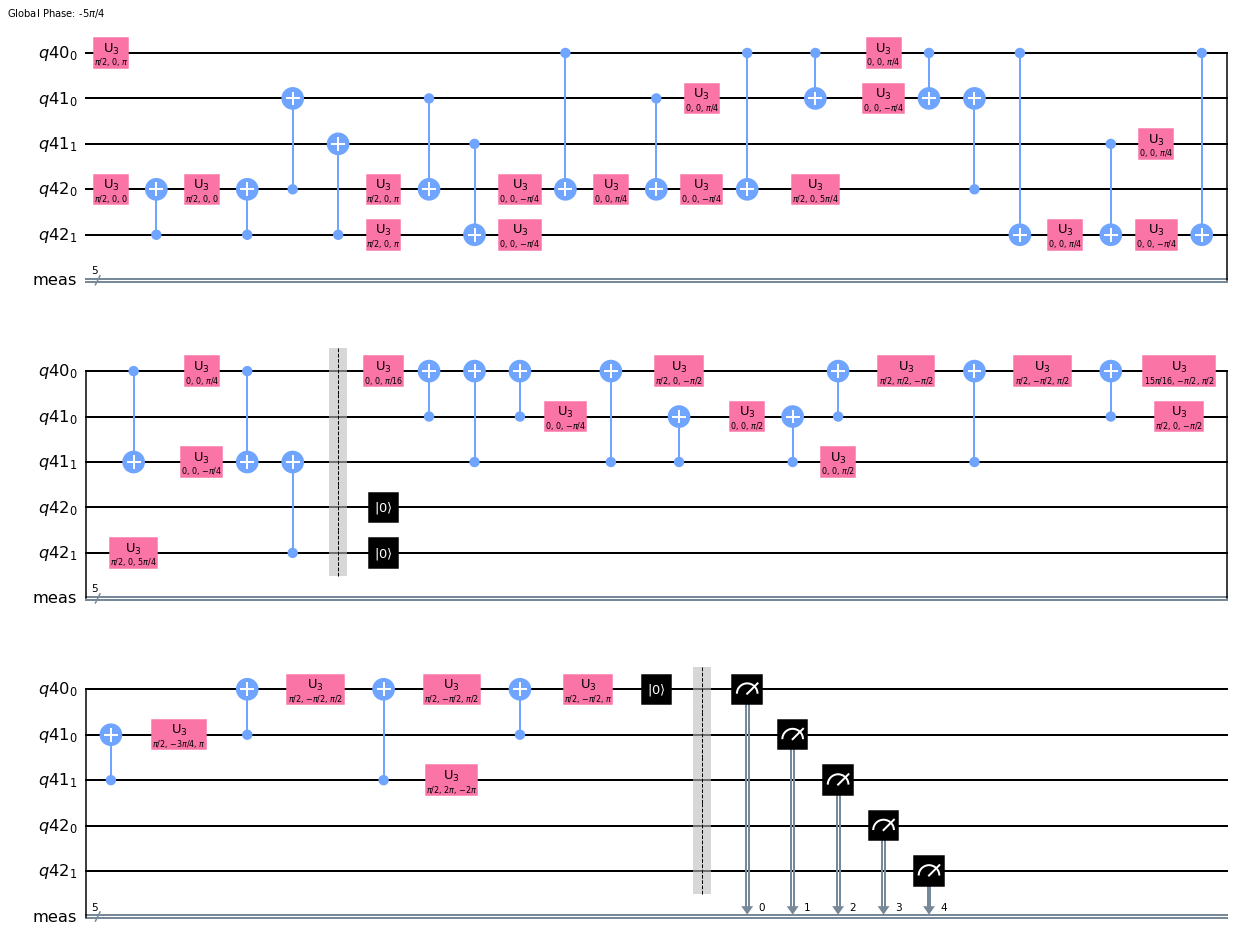

In [6]:
trans_qc=transpile(psicircuit,basis_gates=['cx','u3'])

trans_qc.reset(0)
trans_qc.measure_all()
trans_qc.draw(output="mpl")

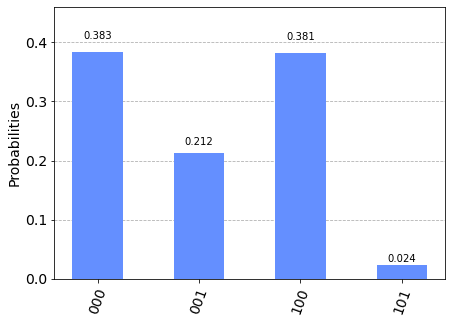

In [11]:
xy

array([4, 2, 0, 0, 0, 1, 0, 0])